### Question #01 (a)

In [1]:
import pandas as pd 
import numpy as np
import keras as k
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv('diabetes.csv') #reading data from csv file (pandas library usage)

In [3]:
cr = data.corr() # applying correlation function to find dependency 
cr #print values in matrix form which shows the relation between features 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


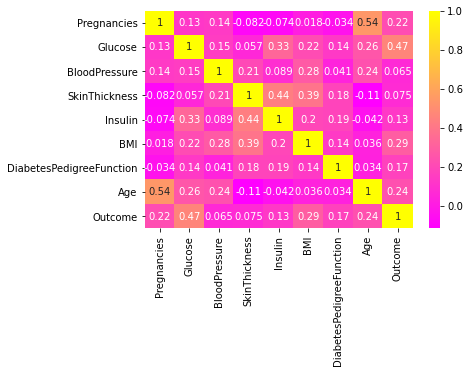

In [4]:
sn.heatmap(cr, annot= True, cmap=plt.cm.spring) #plotting correlation using seaborn library
plt.show()

### Question #01 (b)

In [5]:
# extraction two(age and blood pressure) features from given dataset
age = data.Age.values # as indpendent variable
BP = data.BloodPressure.values # as dependent variable
lnrModel = k.Sequential() # this(sequential) class of keras allows to create model layer-by-layer
lnrModel.add(k.layers.Dense(1, input_shape=(1,))) #dense implements the activation function 
lnrModel.compile(k.optimizers.Adam(lr=0.1), 'mean_squared_error') # MSE is activation function , lr is learning rate
#Adam optimization is a stochastic gradient descent method
RGN = lnrModel.fit(age,BP, epochs=20, batch_size=20) #fit method adjusts weights according to data values (used for training)
'''
The batch size is a number of samples (20) processed before the model is updated.
The number of epochs(20) is the number of complete passes through the training dataset.
'''

Epoch 1/20
39/39 [==============================] - 0s 3ms/step - loss: 733.4703
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 665.7311
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 631.6797
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 639.2600
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 589.8575
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 574.5441
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 551.5088
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 542.7959
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 512.1027
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 493.9858
Epoch 11/20
39/39 [==============================] - 0s 2ms/step - loss: 484.5909
Epoch 12/20
39/39 [==============================] - 0s 2ms/step - loss: 471.1138
Epoch 13/20
39/39 [======

'\nThe batch size is a number of samples (20) processed before the model is updated.\nThe number of epochs(20) is the number of complete passes through the training dataset.\n'

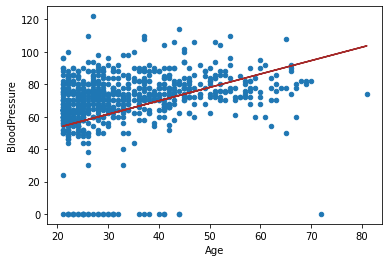

In [6]:
data.plot(kind='scatter', x='Age', y='BloodPressure') # plotting data values
BP_pred = lnrModel.predict(age) #predict is used for testing (predicte blood pressure based on age) - sklearn library usage
plt.plot(age, BP_pred, color='brown') #Ploting the linear regression line

In [7]:
newAge= float(input("Enter value of age for BP prediction:")) #asking user input for age 
print(lnrModel.predict([newAge])) #outputs the Blood pressure value based on user input age value

Enter value of age for BP prediction:50
[[78.07881]]


dict_keys(['loss'])


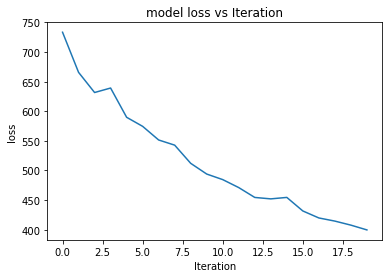

In [8]:
print(RGN.history.keys()) 
'''
The history object is returned from calls to the fit() function used to train the model.
history is default callback used with keras when training the model.
history records training metrics for each epochs
'''
loss = plt.plot(RGN.history['loss']) 
plt.title('model loss vs Iteration')  
plt.ylabel('loss') 
plt.xlabel('Iteration')
plt.show()

### Question #01 (c)

In [9]:
def exponential_loss(age, BP):
    return tf.keras.metrics.Mean(tf.keras.activations.exponential(- age * BP))

In [13]:
age =  data.Age.values # as indpendent variable
BP = data.BloodPressure.values # as dependent variable
age = tf.cast(BP, dtype=tf.int64)
print(type(age))
lnrModel = k.Sequential() # this(sequential) class of keras allows to create model layer-by-layer
lnrModel.add(k.layers.Dense(64, input_shape=(1,))) #dense implements the activation function 
lnrModel.compile(k.optimizers.Adam(lr=0.1), loss=exponential_loss) # MSE is activation function , lr is learning rate
#Adam optimization is a stochastic gradient descent method
RGN = lnrModel.fit((age),(BP), epochs=20, batch_size=20) #fit method adjusts weights according to data values (used for training)

<class 'tensorflow.python.framework.ops.EagerTensor'>


TypeError: only size-1 arrays can be converted to Python scalars